################################################################################
# Non-Machine Learning Approach
################################################################################

In [ ]:
# packages
using CSV, GLM, Plots, TypedTables

In [ ]:
data = CSV.File("housingdata.csv");

In [ ]:
X = data.size

Y = round.(Int, data.price / 1000)

t = Table(X = X, Y = Y);


In [ ]:
# use Plots package to generate scatter plot of data
gr(size = (600, 600))

In [ ]:
# create scatter plot
p_scatter = scatter(X, Y,
    xlims = (0, 5000),
    ylims = (0, 800),
    xlabel = "Size (sqft)",
    ylabel = "Price (in thousands of dollars)",
    title = "Housing Prices in Portland",
    legend = false,
    color = :red
)

In [ ]:
# use GLM package for Linear Regression model
ols = lm(@formula(Y ~ X), t)

In [ ]:
# add linear regression line to plot
plot!(X, predict(ols), color = :green, linewidth = 3)

In [ ]:
# predict price based on a new value for size
newX = Table(X = [1250])

predict(ols, newX)

################################################################################
# Machine Learning Approach
################################################################################

In [59]:
epochs = 0

0

In [ ]:
# use Plots package to generate scatter plot of data
gr(size = (600, 600))

Plots.GRBackend()

# create scatter plot

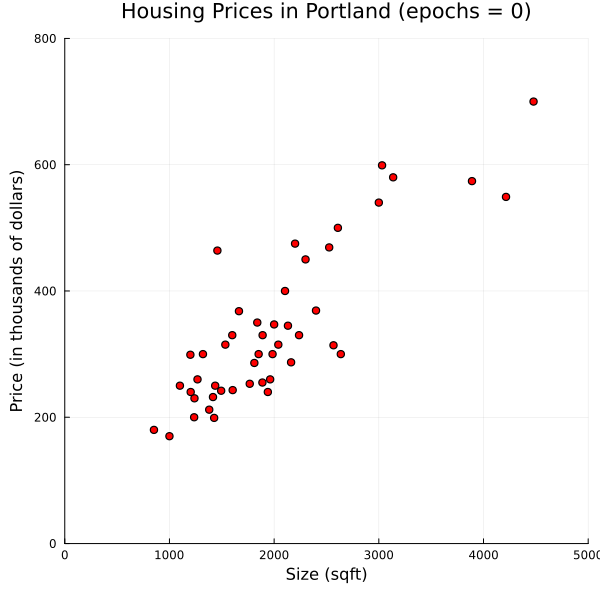

In [61]:
p_scatter = scatter(X, Y,
    xlims = (0, 5000),
    ylims = (0, 800),
    xlabel = "Size (sqft)",
    ylabel = "Price (in thousands of dollars)",
    title = "Housing Prices in Portland (epochs = $epochs)",
    legend = false,
    color = :red
)

# initialize parameters

In [62]:
theta_0 = 0.0    # y-intercept

theta_1 = 0.0    # slope

0.0

# define linear regression model

In [63]:
h(x) = theta_0 .+ theta_1 * x

h (generic function with 1 method)

# add linear regression line to plot

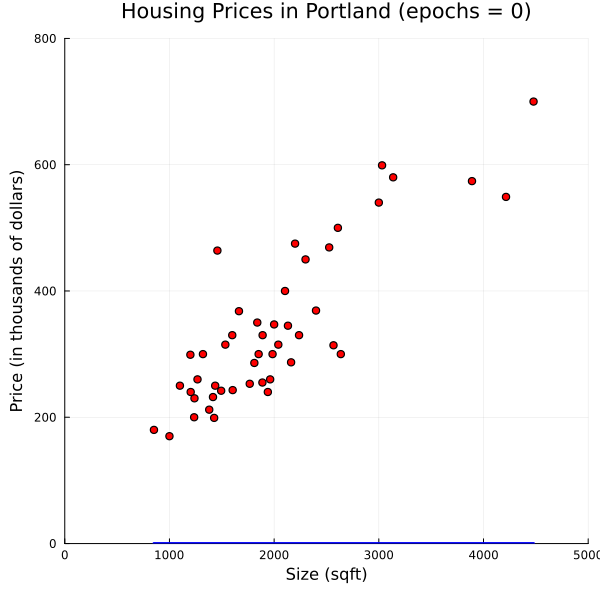

In [64]:
plot!(X, h(X), color = :blue, linewidth = 3)

# use cost function from Andrew Ng

In [65]:
m = length(X)

y_hat = h(X)

function cost(X, Y)
    (1 / (2 * m)) * sum((y_hat - Y).^2)
end

J = cost(X, Y)

65601.13829787234

# push cost value into vector

In [66]:
J_history = []

push!(J_history, J)

1-element Vector{Any}:
 65601.13829787234

# define batch gradient descent algorithm
# use partial derivative formulae from Andrew Ng

In [80]:
function pd_theta_0(X, Y)
    (1 / m) * sum(y_hat - Y)
end

function pd_theta_1(X, Y)
    (1 / m) * sum((y_hat - Y) .* X)
end

pd_theta_1 (generic function with 1 method)

# set learning rates (alpha)

In [68]:
alpha_0 = 0.09
alpha_1 = 0.00000008

8.0e-8

################################################################################
# begin iterations (repeat until convergence)
################################################################################

# calculate partial derivatives

In [69]:
theta_0_temp = pd_theta_0(X, Y)

theta_1_temp = pd_theta_1(X, Y)

-764282.0425531914

# adjust parameters by the learning rate

In [70]:
theta_0 -= alpha_0 * theta_0_temp

theta_1 -= alpha_1 * theta_1_temp

0.061142563404255314

# recalculate cost

In [71]:
y_hat = h(X)

J = cost(X, Y)

push!(J_history, J)

2-element Vector{Any}:
 65601.13829787234
 21294.442905808777

# replot prediction

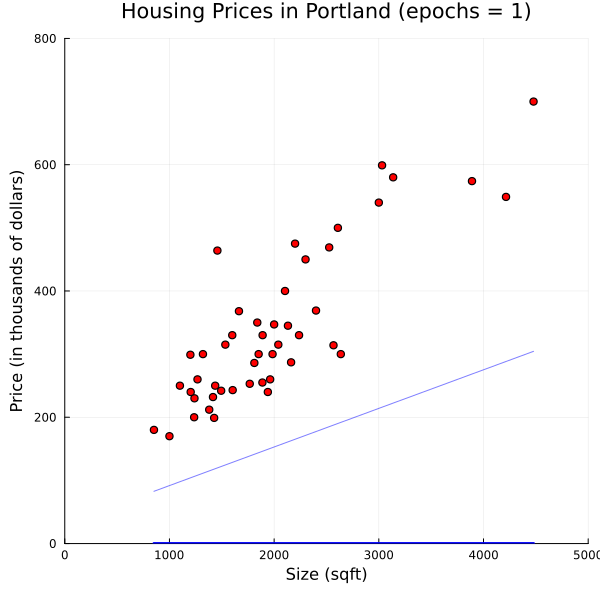

In [72]:
epochs += 1

plot!(X, y_hat, color = :blue, alpha = 0.5,
    title = "Housing Prices in Portland (epochs = $epochs)"
)

################################################################################
# end iterations
################################################################################

# measure performance

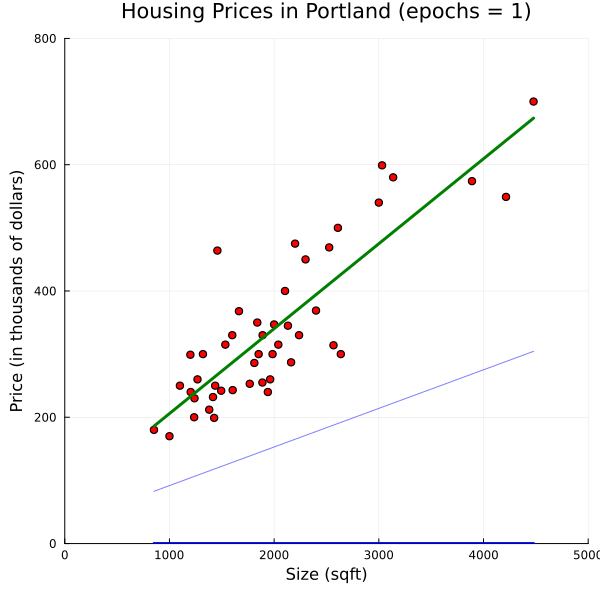

In [73]:
plot!(X, predict(ols), color = :green, linewidth = 3)

# plot learning curve

In [1]:
gr(size = (600, 600))

p_line = plot(0:epochs, J_history,
    xlabel = "Epochs",
    ylabel = "Cost",
    title = "Learning Curve",
    legend = false,
    color = :blue,
    linewidth = 2
)

UndefVarError: UndefVarError: `gr` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

# predict price based on a new value for size

In [75]:
newX_ml = [1250]

h(newX_ml)

1-element Vector{Float64}:
 107.06841702127659

# check ml prediction against non-ml prediction (GLM)

In [76]:
predict(ols, newX)

1-element Vector{Union{Missing, Float64}}:
 239.4556726896737